<a href="https://colab.research.google.com/github/pranab-martiniapp/data-science-boot-camp/blob/main/Projects/Project_3/SQL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 - SQLite

## Setup Imports

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Setup SQLite


In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
!sqlite3 --version

3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


## Setup DB

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Apr  8 21:58 .
drwxr-xr-x 1 root root   4096 Apr  8 21:57 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  8 21:58 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  5 13:20 .config
drwxr-xr-x 1 root root   4096 Apr  5 13:21 sample_data


## Questions

### 1 - Customers not in the US

Provide a query showing Customers (just their full names, customer ID and country) who are not in the US.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
 CustomerId,
 FirstName || ' ' || LastName AS FullName,
 Country
FROM
	customers
WHERE
	customers.Country != 'USA'

CustomerId  FullName               Country       
----------  ---------------------  --------------
1           Luís Gonçalves         Brazil        
2           Leonie Köhler          Germany       
3           François Tremblay      Canada        
4           Bjørn Hansen           Norway        
5           František Wichterlová  Czech Republic
6           Helena Holý            Czech Republic
7           Astrid Gruber          Austria       
8           Daan Peeters           Belgium       
9           Kara Nielsen           Denmark       
10          Eduardo Martins        Brazil        
11          Alexandre Rocha        Brazil        
12          Roberto Almeida        Brazil        
13          Fernanda Ramos         Brazil        
14          Mark Philips           Canada        
15          Jennifer Peterson      Canada        
29          Robert Brown           Canada        
30          Edward Francis         Canada        
31          Martha Silk            Canada        


### 2 - Customers from Brazil

Provide a query only showing the Customers from Brazil.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
 CustomerId,
 FirstName || ' ' || LastName AS FullName,
 Country
FROM
	customers
WHERE
	customers.Country == 'Brazil'

CustomerId  FullName         Country
----------  ---------------  -------
1           Luís Gonçalves   Brazil 
10          Eduardo Martins  Brazil 
11          Alexandre Rocha  Brazil 
12          Roberto Almeida  Brazil 
13          Fernanda Ramos   Brazil 


### 3 - Invoices from Brazil

Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full name, Invoice ID, Date of the invoice and billing country.

In [ ]:
%%script sqlite3 --column --header chinook.db
WITH
	cust AS (
	  SELECT
		CustomerId AS CustID,
		FirstName || ' ' || LastName AS FullName
	  FROM customers
	),
	inv AS (
		SELECT
			InvoiceId,
			CustomerId AS InvCustID,
			strftime('%m-%d-%Y', InvoiceDate) AS InvDate,
			BillingCountry
		FROM
      invoices
		WHERE
      BillingCountry = 'Brazil'
	)
SELECT
  InvoiceId,
  FullName,
  InvDate,
  BillingCountry
FROM
  cust
JOIN
  inv ON cust.CustID = inv.InvCustID

InvoiceId  FullName         InvDate     BillingCountry
---------  ---------------  ----------  --------------
25         Eduardo Martins  04-09-2009  Brazil        
34         Roberto Almeida  05-23-2009  Brazil        
35         Fernanda Ramos   06-05-2009  Brazil        
57         Alexandre Rocha  09-06-2009  Brazil        
58         Fernanda Ramos   09-07-2009  Brazil        
68         Alexandre Rocha  10-17-2009  Brazil        
80         Fernanda Ramos   12-10-2009  Brazil        
98         Luís Gonçalves   03-11-2010  Brazil        
121        Luís Gonçalves   06-13-2010  Brazil        
123        Alexandre Rocha  06-17-2010  Brazil        
132        Fernanda Ramos   07-31-2010  Brazil        
143        Luís Gonçalves   09-15-2010  Brazil        
154        Eduardo Martins  11-14-2010  Brazil        
155        Roberto Almeida  11-14-2010  Brazil        
166        Roberto Almeida  12-25-2010  Brazil        
177        Eduardo Martins  02-16-2011  Brazil        
195       

### 4 - Sales Agent Employees

Provide a query showing only the Employees who are Sales Agents.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
	EmployeeId,
	FirstName || ' ' || LastName AS FullName,
	Title
FROM
  employees
WHERE
  Title LIKE '%Agent%'

EmployeeId  FullName       Title              
----------  -------------  -------------------
3           Jane Peacock   Sales Support Agent
4           Margaret Park  Sales Support Agent
5           Steve Johnson  Sales Support Agent


### 5 - Unique Billing Countries

Provide a query showing a unique list of billing countries from the Invoice table.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT BillingCountry
FROM invoices

BillingCountry
--------------
Germany       
Norway        
Belgium       
Canada        
USA           
France        
Ireland       
United Kingdom
Australia     
Chile         
India         
Brazil        
Portugal      
Netherlands   
Spain         
Sweden        
Czech Republic
Finland       
Denmark       
Italy         
Poland        
Austria       
Hungary       
Argentina     


### 6 - Invoices by Sales Agent

Provide a query that shows the invoices associated with each sales agent. The resultant table should include the Sales Agent's full name.

In [ ]:
%%script sqlite3 --column --header chinook.db
WITH
rep AS (
  SELECT
	EmployeeId,
	FirstName || ' ' || LastName AS RepFullName
  FROM
    employees
),
inv AS (
	SELECT
		InvoiceId,
		CustomerId AS InvoiceCustomerId,
		invoices.Total AS InvoiceTotal
	FROM
    invoices
),
cust AS (
  SELECT
	  CustomerID,
	  FirstName || ' ' || LastName AS CustomerFullName,
	  SupportRepID
  FROM
    customers
)
SELECT
  InvoiceId,
  CustomerFullName,
  InvoiceTotal,
  RepFullName
FROM
  inv
JOIN
  cust ON inv.InvoiceCustomerId = cust.CustomerID
JOIN
  rep ON cust.SupportRepID = rep.EmployeeId
ORDER BY
  rep.EmployeeId, inv.InvoiceTotal DESC

InvoiceId  CustomerFullName       InvoiceTotal  RepFullName  
---------  ---------------------  ------------  -------------
96         Ladislav Kovács        21.86         Jane Peacock 
194        Hugh O'Reilly          21.86         Jane Peacock 
313        Isabelle Mercier       16.86         Jane Peacock 
103        Frank Ralston          15.86         Jane Peacock 
193        Fynn Zimmermann        14.91         Jane Peacock 
327        Luís Gonçalves         13.86         Jane Peacock 
110        François Tremblay      13.86         Jane Peacock 
166        Roberto Almeida        13.86         Jane Peacock 
47         Jennifer Peterson      13.86         Jane Peacock 
341        Michelle Brooks        13.86         Jane Peacock 
26         Tim Goyer              13.86         Jane Peacock 
180        Robert Brown           13.86         Jane Peacock 
278        Edward Francis         13.86         Jane Peacock 
159        Ellie Sullivan         13.86         Jane Peacock 
138     

### 7 - Total Sales for 2009 - 2013

What is the total sales for each year between 2009 - 2013?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  strftime('%Y', InvoiceDate) AS Year,
  SUM(Total) AS InvoiceTotal
FROM
  invoices
GROUP BY
  strftime('%Y', InvoiceDate)

Year  InvoiceTotal
----  ------------
2009  449.46      
2010  481.45      
2011  469.58      
2012  477.53      
2013  450.58      


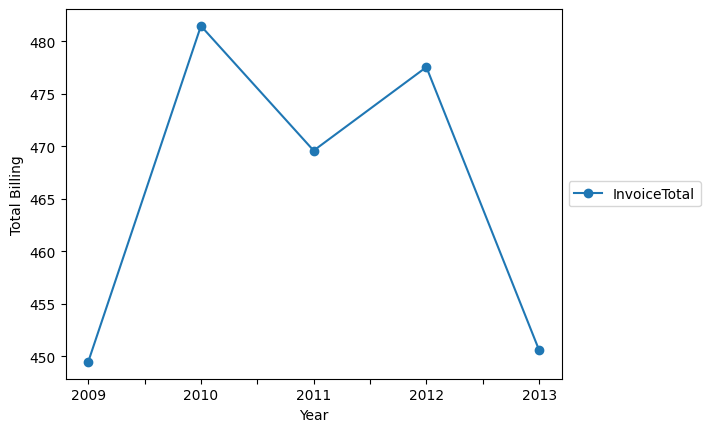

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('chinook.db')

# Execute the SQL query and store the result in a DataFrame
df = pd.read_sql_query("""
  SELECT
    strftime('%Y', InvoiceDate) AS Year,
    SUM(Total) AS InvoiceTotal
  FROM
    invoices
  GROUP BY
    strftime('%Y', InvoiceDate)
""", conn)

# Close the database connection
conn.close()

# Plot a bar graph
ax = df.plot(kind='line', x='Year', y='InvoiceTotal', xlabel='Year', ylabel='Total Billing', legend=False, marker='o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 8 - Line Items in Each Invoice

Looking at the InvoiceItems table, provide a query that COUNTs the number of line items for each Invoice.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
	invoice_items.InvoiceId AS InvoiceId,
	COUNT(*) AS LineItemCount
FROM
	invoice_items
JOIN
  invoices ON invoice_items.InvoiceId = invoices.InvoiceId
GROUP BY
  invoices.InvoiceId

InvoiceId  LineItemCount
---------  -------------
1          2            
2          4            
3          6            
4          9            
5          14           
6          1            
7          2            
8          2            
9          4            
10         6            
11         9            
12         14           
13         1            
14         2            
15         2            
16         4            
17         6            
18         9            
19         14           
20         1            
21         2            
22         2            
23         4            
24         6            
25         9            
26         14           
27         1            
28         2            
29         2            
30         4            
31         6            
32         9            
33         14           
34         1            
35         2            
36         2            
37         4            
38         6            


### 9 - Sales Per Genre

Provide a query that shows total sales per genre.

In [ ]:
%%script sqlite3 --column --header chinook.db
WITH track_billing AS (
    SELECT
        tracks.GenreId,
        ROUND(SUM(invoice_items.UnitPrice * invoice_items.Quantity), 2) AS GenreBilling
    FROM
        tracks
    JOIN
        invoice_items ON tracks.TrackId = invoice_items.TrackId
    GROUP BY
        tracks.GenreId
),
genre_names AS (
    SELECT
        GenreId,
        Name AS Genre
    FROM
        genres
)
SELECT
    genre_names.Genre,
    COALESCE(track_billing.GenreBilling, 0) AS TotalBilling
FROM
    genre_names
LEFT JOIN
    track_billing  ON genre_names.GenreId = track_billing.GenreId
ORDER BY
    TotalBilling DESC

Genre               TotalBilling
------------------  ------------
Rock                826.65      
Latin               382.14      
Metal               261.36      
Alternative & Punk  241.56      
TV Shows            93.53       
Jazz                79.2        
Blues               60.39       
Drama               57.71       
R&B/Soul            40.59       
Classical           40.59       
Sci Fi & Fantasy    39.8        
Reggae              29.7        
Pop                 27.72       
Soundtrack          19.8        
Comedy              17.91       
Hip Hop/Rap         16.83       
Bossa Nova          14.85       
Alternative         13.86       
World               12.87       
Science Fiction     11.94       
Heavy Metal         11.88       
Electronica/Dance   11.88       
Easy Listening      9.9         
Rock And Roll       5.94        
Opera               0           


### 10 - Sales Agent Workload

Provide a query that shows the # of customers assigned to each sales agent.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
    employees.FirstName || ' ' || employees.LastName AS SalesRepName,
    COUNT(customers.CustomerId) AS NumberOfCustomers
FROM
    employees
LEFT JOIN
    customers ON employees.EmployeeId = customers.SupportRepId
WHERE
    employees.Title = 'Sales Support Agent'
GROUP BY
    employees.FirstName, employees.LastName
ORDER BY
    NumberOfCustomers DESC

SalesRepName   NumberOfCustomers
-------------  -----------------
Jane Peacock   21               
Margaret Park  20               
Steve Johnson  18               


### 11 - Best Sales Agent Per Year

Which sales agent made the most in sales in each year?

In [ ]:
%%script sqlite3 --column --header chinook.db
WITH sales_data AS (
    SELECT
        employees.FirstName || ' ' || employees.LastName AS SalesRepName,
        strftime('%Y', invoices.InvoiceDate) AS Year,
        SUM(invoices.Total) AS TotalBilling
    FROM
        employees
    LEFT JOIN
        customers ON employees.EmployeeId = customers.SupportRepId
    LEFT JOIN
        invoices ON customers.CustomerId = invoices.CustomerId
    WHERE
        employees.Title = 'Sales Support Agent'
    GROUP BY
        Year, SalesRepName
)
SELECT
    Year,
    SalesRepName,
    MAX(TotalBilling) AS MaxTotalBilling
FROM
    sales_data
GROUP BY
    Year

Year  SalesRepName   MaxTotalBilling
----  -------------  ---------------
2009  Steve Johnson  164.34         
2010  Jane Peacock   221.92         
2011  Jane Peacock   184.34         
2012  Margaret Park  197.2          
2013  Margaret Park  168.3          


### 12 - Top 3 Best Selling Albums

Provide a query that shows the top 3 best selling albums.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
    albums.Title AS AlbumTitle,
    ROUND(SUM(invoice_items.UnitPrice * invoice_items.Quantity), 2) AS TotalBilling
FROM
  albums
INNER JOIN
    tracks ON albums.AlbumId = tracks.AlbumId
INNER JOIN
    invoice_items ON tracks.TrackId = invoice_items.TrackId
GROUP BY
    albums.AlbumId
ORDER BY
    TotalBilling DESC
LIMIT 3

AlbumTitle                                TotalBilling
----------------------------------------  ------------
Battlestar Galactica (Classic), Season 1  35.82       
The Office, Season 3                      31.84       
Minha Historia                            26.73       


### 13 - Top 3 Best Selling Artists

Provide a query that shows the top 3 best selling artists.

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
    artists.Name AS ArtistName,
    ROUND(SUM(invoice_items.UnitPrice * invoice_items.Quantity), 2) AS TotalBilling
FROM
    artists
INNER JOIN
    albums ON artists.ArtistId = albums.ArtistId
INNER JOIN
    tracks ON albums.AlbumId = tracks.AlbumId
INNER JOIN
    invoice_items ON tracks.TrackId = invoice_items.TrackId
GROUP BY
    artists.ArtistId
ORDER BY
    TotalBilling DESC
LIMIT 3

ArtistName   TotalBilling
-----------  ------------
Iron Maiden  138.6       
U2           105.93      
Metallica    90.09       
